### Clustering Model (Task2)

In [23]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



from scipy.stats import mode

### Loa the Data processed in task 1

In [24]:
# 1. Load dataset
path = r'C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2040A\Final Exam\DSA_2040_Practical_Exam_Ambachow_550\K_Mean_Clustering\Cleaned_iris_data_preprocessed.csv'
df = pd.read_csv(path)
print("✅ Dataset loaded successfully.")
print(df.head())

✅ Dataset loaded successfully.
   sepal_length  sepal_width  petal_length  petal_width       class
0      0.088235     0.666667      0.000000     0.041667      setosa
1      0.411765     1.000000      0.084746     0.125000      setosa
2      0.705882     0.458333      0.576271     0.541667  versicolor
3      0.147059     0.583333      0.101695     0.041667      setosa
4      0.029412     0.500000      0.050847     0.041667      setosa


### Separate Features and Target

In [25]:
# Separate features and target
X = df.drop(columns=['class'])
y_true = df['class']

#### Fit the model K(3)-mean

In [26]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred_3 = kmeans_3.fit_predict(X)

#### Make predictions

In [27]:
# Add predictions to the DataFrame
df['PredictedCluster'] = y_pred_3

# Show first few rows with true class and predicted cluster
print(df[['class', 'PredictedCluster']].head(10))

        class  PredictedCluster
0      setosa                 1
1      setosa                 1
2  versicolor                 2
3      setosa                 1
4      setosa                 1
5   virginica                 0
6  versicolor                 2
7      setosa                 1
8      setosa                 1
9      setosa                 1


#### Visualize how our model prediction is working 

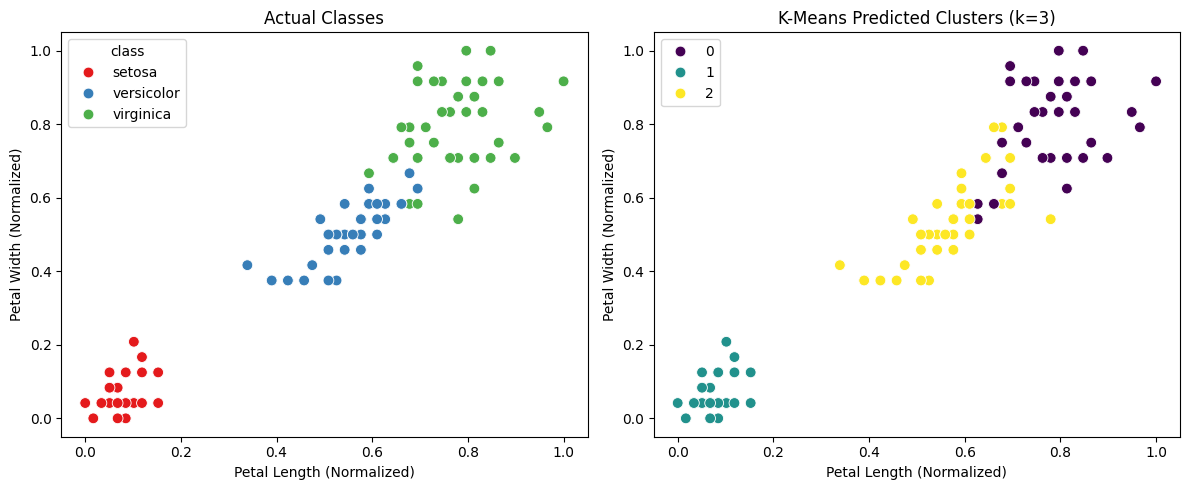

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ---- Actual Classes ----
sns.scatterplot(
    x=X['petal_length'], y=X['petal_width'],
    hue=y_true, palette='Set1', s=60, ax=axes[0]
)
axes[0].set_title("Actual Classes")
axes[0].set_xlabel("Petal Length (Normalized)")
axes[0].set_ylabel("Petal Width (Normalized)")

# ---- K-Means Predicted Clusters ----
sns.scatterplot(
    x=X['petal_length'], y=X['petal_width'],
    hue=y_pred_3, palette='viridis', s=60, ax=axes[1]
)
axes[1].set_title("K-Means Predicted Clusters (k=3)")
axes[1].set_xlabel("Petal Length (Normalized)")
axes[1].set_ylabel("Petal Width (Normalized)")

plt.tight_layout()
plt.show()


In [29]:
# Compare clusters to actual classes
ari_3 = adjusted_rand_score(y_true, y_pred_3)
print(f"Adjusted Rand Index (k=3): {ari_3:.4f}")


Adjusted Rand Index (k=3): 0.7240


An Adjusted Rand Index (ARI) of 0.7292 means your K-Means clustering with k=3 is doing a good job of grouping the Iris data similarly to the actual species labels, but it’s not perfect

#### K-Means with k=2 

In [30]:
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
y_pred_2 = kmeans_2.fit_predict(X)
ari_2 = adjusted_rand_score(y_true, y_pred_2)
print(f"Adjusted Rand Index (k=2): {ari_2:.4f}")

Adjusted Rand Index (k=2): 0.5709


#### K-Means with k=4

In [31]:
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
y_pred_4 = kmeans_4.fit_predict(X)
ari_4 = adjusted_rand_score(y_true, y_pred_4)
print(f"Adjusted Rand Index (k=4): {ari_4:.4f}")

Adjusted Rand Index (k=4): 0.6306


  **Interesting!** at 
- k=2, Adjusted Rand Index (k=2): 0.5706
- Adjusted Rand Index (k=3): 0.7292
- at k=4, Adjusted Rand Index (k=4): 0.6297
We have to find the optimal value of k

### Elbow Method to find the optimal K

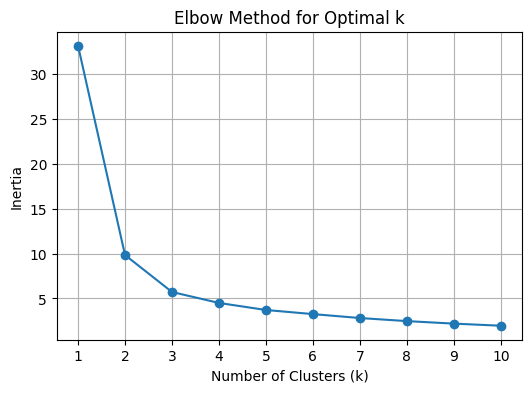

In [32]:
# Try k values from 1 to 10
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia_values.append(km.inertia_)

# Plot the Elbow
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


**K=3** is the optimal k based on what elbow plot

#### Petal Length vs Petal Width with K-Means k=3

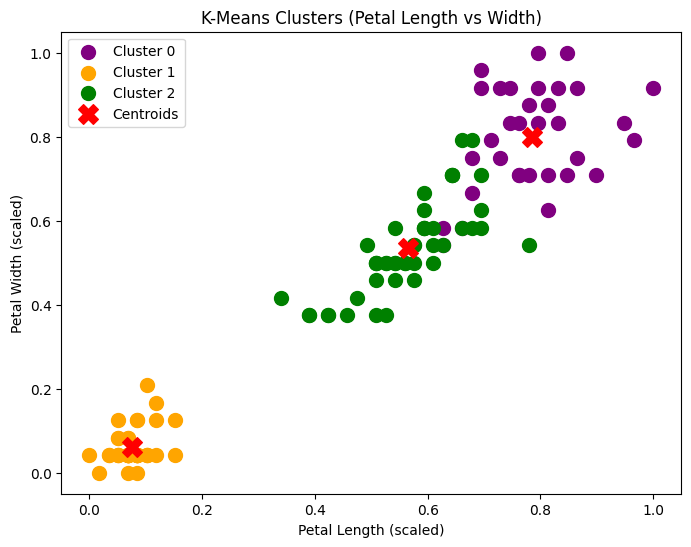

In [33]:
plt.figure(figsize=(8,6))

# Scatter by predicted cluster
plt.scatter(X.loc[y_pred_3 == 0, 'petal_length'], X.loc[y_pred_3 == 0, 'petal_width'],
            s=100, c='purple', label='Cluster 0')
plt.scatter(X.loc[y_pred_3 == 1, 'petal_length'], X.loc[y_pred_3 == 1, 'petal_width'],
            s=100, c='orange', label='Cluster 1')
plt.scatter(X.loc[y_pred_3 == 2, 'petal_length'], X.loc[y_pred_3 == 2, 'petal_width'],
            s=100, c='green', label='Cluster 2')

# Cluster centroids
centers = kmeans_3.cluster_centers_
plt.scatter(centers[:, X.columns.get_loc('petal_length')],
            centers[:, X.columns.get_loc('petal_width')],
            s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.title('K-Means Clusters (Petal Length vs Width)')
plt.legend()
plt.show()
